## Import libraries

In [2]:
import pandas as pd
import numpy as np


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

## Import the dataset

In [5]:
df = pd.read_csv("financial_risk_assessment.csv")

In [6]:
df.head()


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
2,31,Non-binary,Master's,Widowed,45280.0,672.0,6553.0,Personal,Self-employed,1,Good,0.378890,NaN,NaN,West Lindaview,MD,Bouvet Island (Bouvetoya),0.0,1,Low
3,18,Male,Bachelor's,Widowed,93678.0,NaN,NaN,Business,Unemployed,10,Poor,0.396636,246597.0,1.0,Melissahaven,MA,Honduras,1.0,1,Low
4,32,Non-binary,Bachelor's,Widowed,20205.0,710.0,NaN,Auto,Unemployed,4,Fair,0.335965,227599.0,0.0,North Beverly,DC,Pitcairn Islands,4.0,2,Low


In [7]:
df.tail()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
10495,40,Male,High School,Married,43655.0,614.0,34565.0,Home,Unemployed,11,Poor,0.399901,32179.0,4.0,Curtismouth,IA,Uzbekistan,1.0,1,Low
10496,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
10497,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
10498,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High
10499,24,Non-binary,Bachelor's,Widowed,NaN,765.0,NaN,Personal,Self-employed,18,Excellent,0.116083,71699.0,3.0,South Stacy,WA,Saint Pierre and Miquelon,3.0,2,Low


In [8]:
df.shape

(10500, 20)

## Sanity Check

In [10]:
## Check duplicates
df.duplicated().sum()

0

In [11]:
# Check null count
df.isnull().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   1573
Credit Score             1555
Loan Amount              1600
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             1609
Number of Dependents     1571
City                        0
State                       0
Country                     0
Previous Defaults        1533
Marital Status Change       0
Risk Rating                 0
dtype: int64

In [12]:
# Check null count as percentage
col_num=0 
TotalObjects =df.shape[0] 
print ("Column\t\t\t\t\t Null Values%") 
for x in df: 
 nullCount =df[x].isnull().sum(); 
 nullPercent = nullCount*100 / (TotalObjects) 
 print(str(x)+"\t\t\t\t\t "+str(nullPercent)) 


Column					 Null Values%
Age					 0.0
Gender					 0.0
Education Level					 0.0
Marital Status					 0.0
Income					 14.980952380952381
Credit Score					 14.80952380952381
Loan Amount					 15.238095238095237
Loan Purpose					 0.0
Employment Status					 0.0
Years at Current Job					 0.0
Payment History					 0.0
Debt-to-Income Ratio					 0.0
Assets Value					 15.323809523809524
Number of Dependents					 14.961904761904762
City					 0.0
State					 0.0
Country					 0.0
Previous Defaults					 14.6
Marital Status Change					 0.0
Risk Rating					 0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10500 non-null  int64  
 1   Gender                 10500 non-null  object 
 2   Education Level        10500 non-null  object 
 3   Marital Status         10500 non-null  object 
 4   Income                 8927 non-null   float64
 5   Credit Score           8945 non-null   float64
 6   Loan Amount            8900 non-null   float64
 7   Loan Purpose           10500 non-null  object 
 8   Employment Status      10500 non-null  object 
 9   Years at Current Job   10500 non-null  int64  
 10  Payment History        10500 non-null  object 
 11  Debt-to-Income Ratio   10500 non-null  float64
 12  Assets Value           8891 non-null   float64
 13  Number of Dependents   8929 non-null   float64
 14  City                   10500 non-null  object 
 15  St

In [14]:
#identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Gender
Non-binary    3565
Female        3499
Male          3436
Name: count, dtype: int64
******************************
Education Level
Bachelor's     2677
High School    2627
PhD            2624
Master's       2572
Name: count, dtype: int64
******************************
Marital Status
Widowed     2713
Divorced    2649
Single      2597
Married     2541
Name: count, dtype: int64
******************************
Loan Purpose
Personal    2669
Home        2628
Auto        2603
Business    2600
Name: count, dtype: int64
******************************
Employment Status
Self-employed    3530
Unemployed       3489
Employed         3481
Name: count, dtype: int64
******************************
Payment History
Excellent    2676
Good         2664
Poor         2602
Fair         2558
Name: count, dtype: int64
******************************
City
Lake Michael            15
Port Michael            13
West Michael            12
East Michael            11
Port David              10
                      

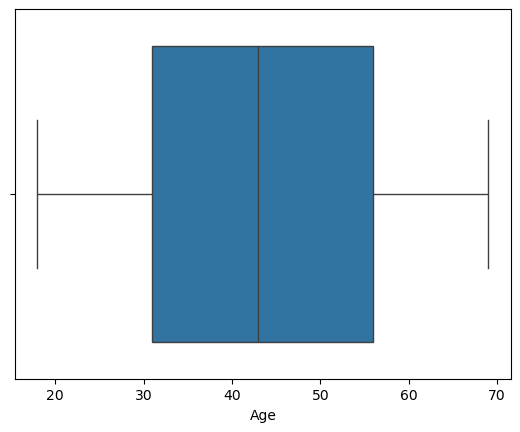

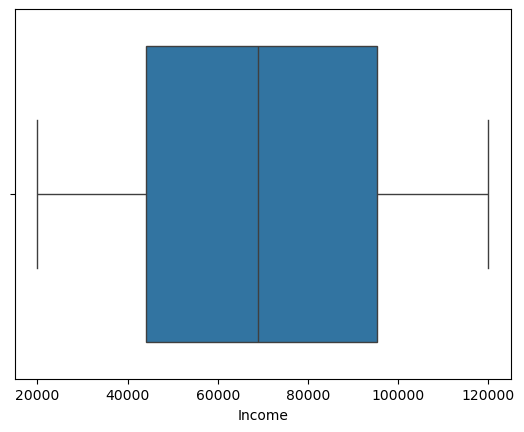

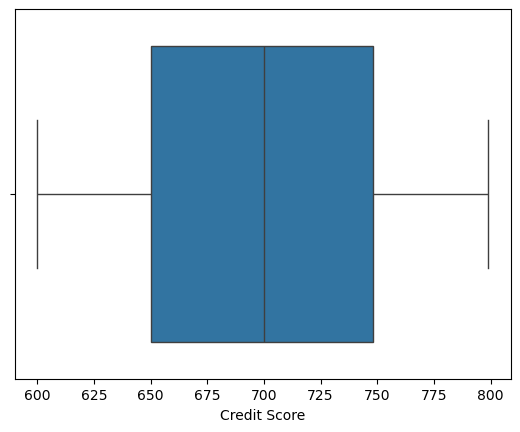

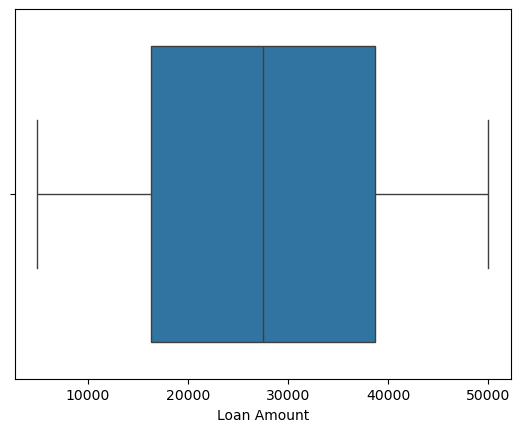

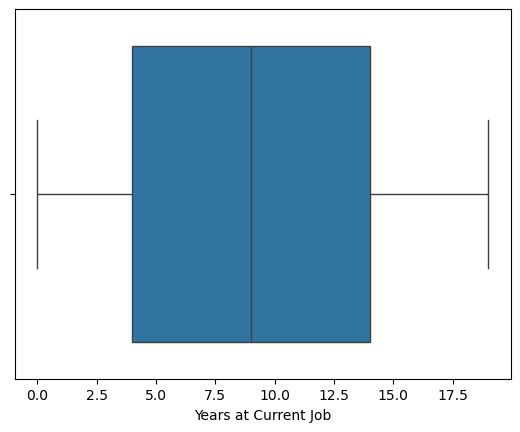

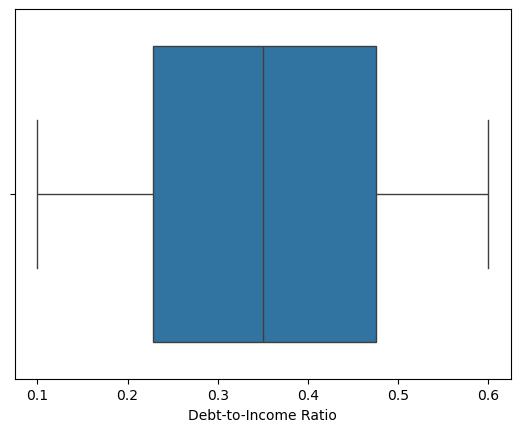

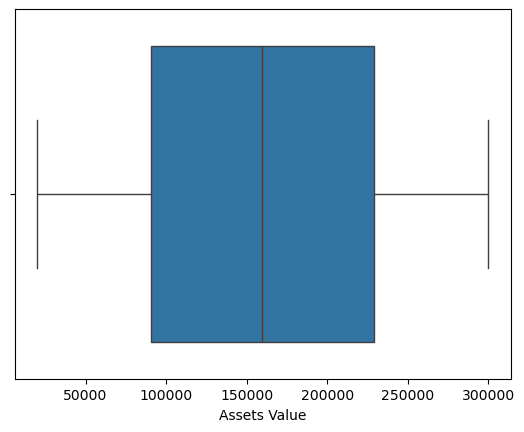

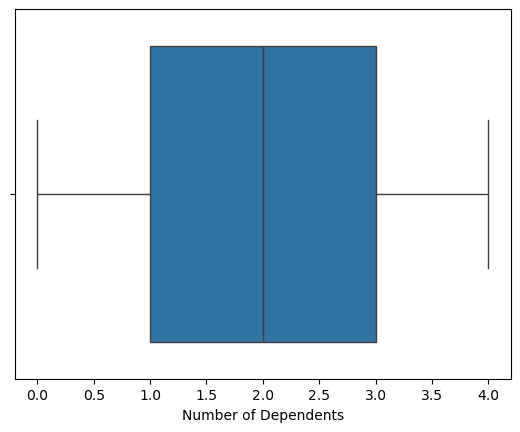

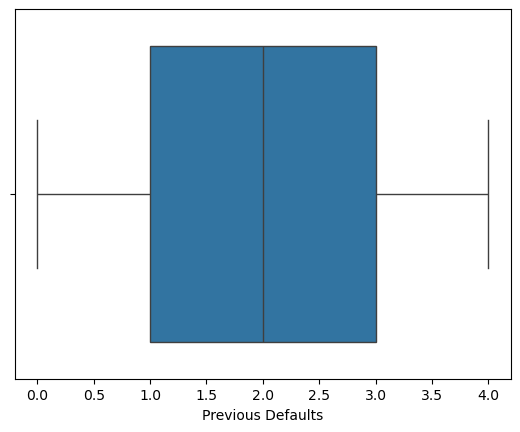

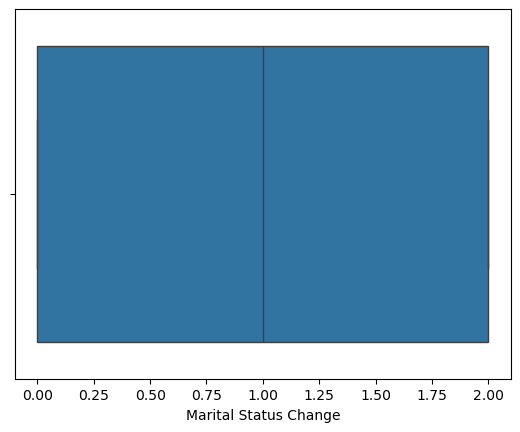

In [15]:
#Boxplots for check outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

## Exploratory Data Analysis

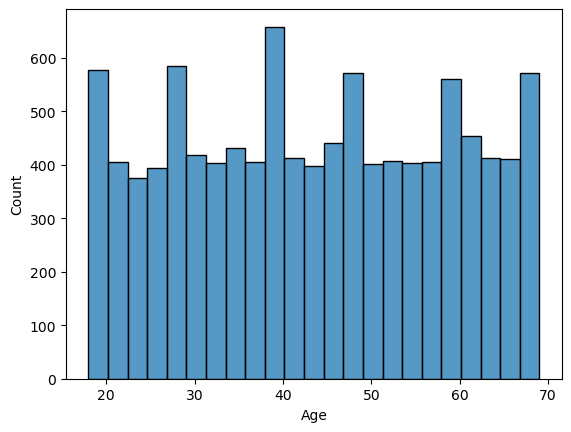

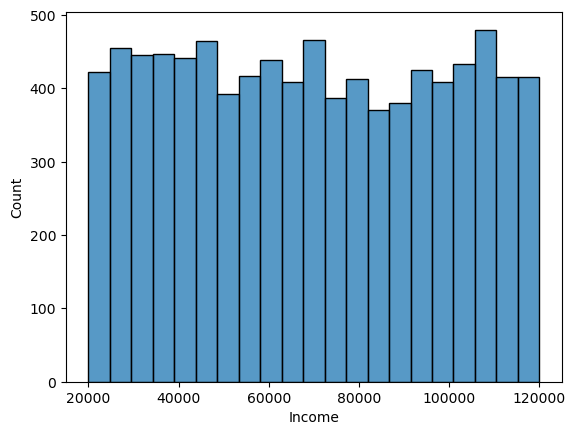

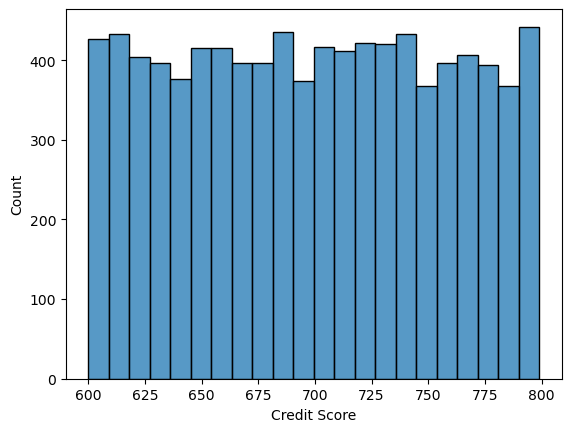

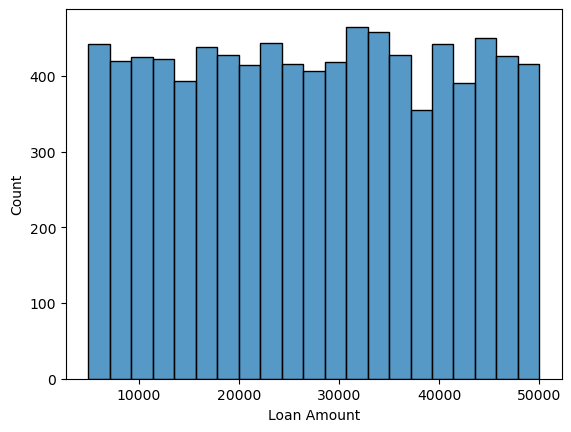

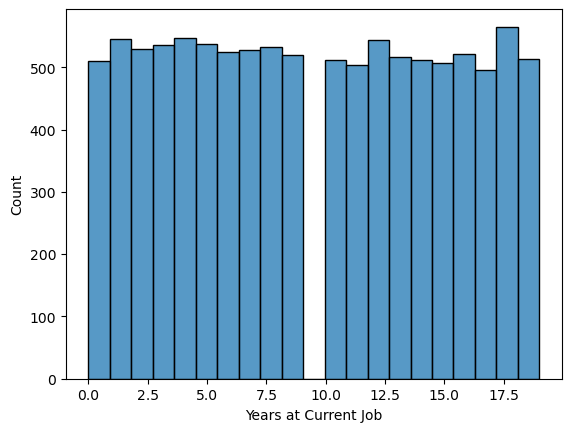

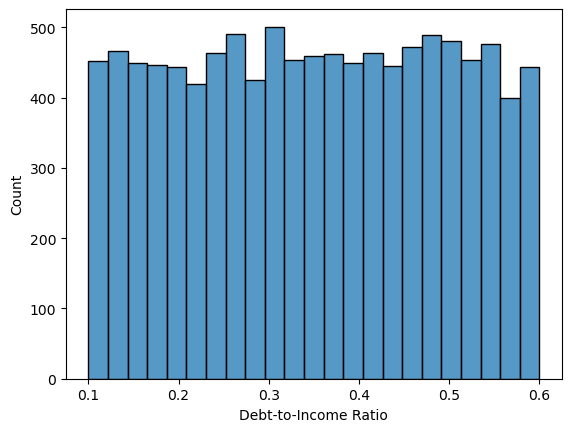

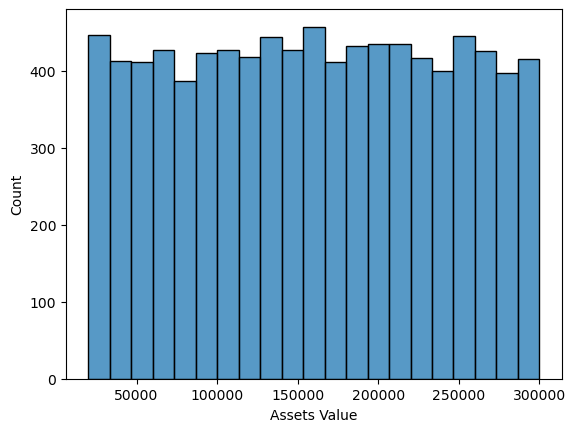

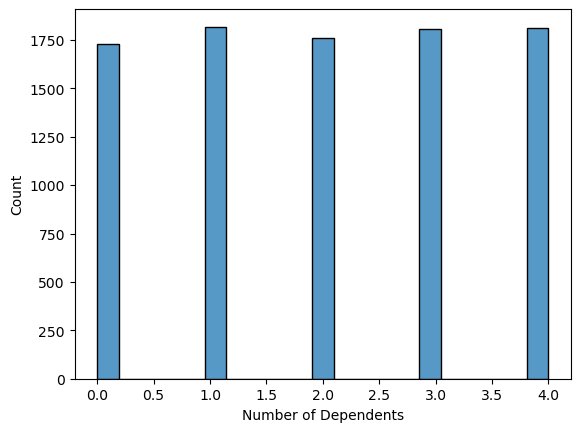

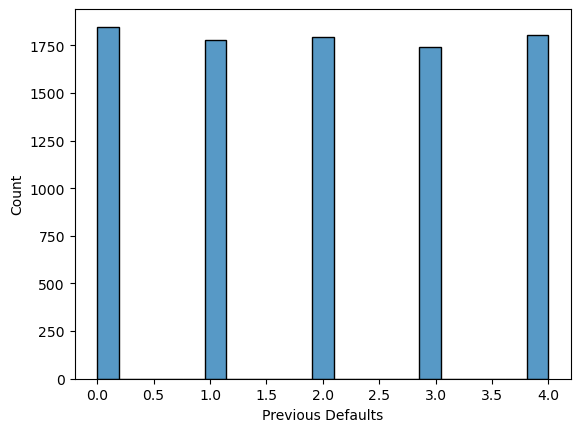

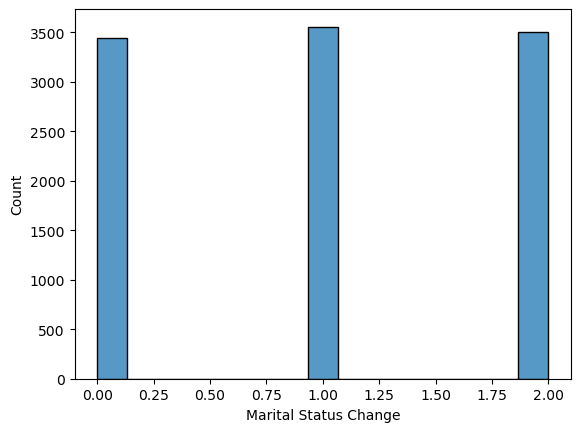

In [17]:
#histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()


In [18]:

df.select_dtypes(include="number").columns

Index(['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
       'Previous Defaults', 'Marital Status Change'],
      dtype='object')

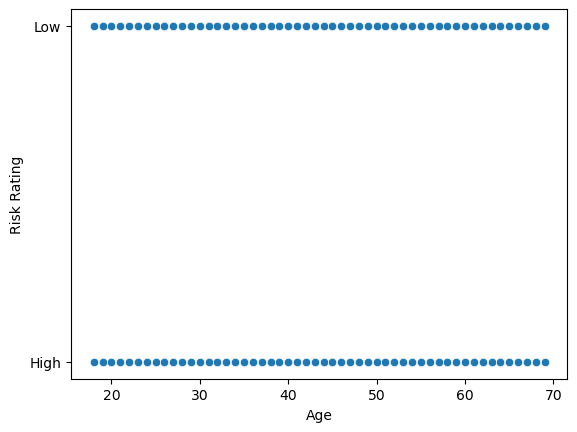

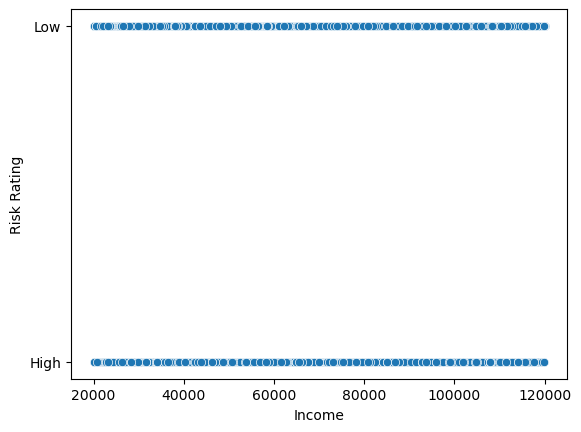

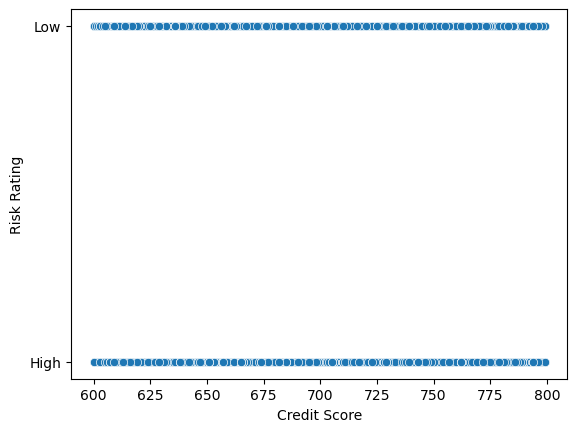

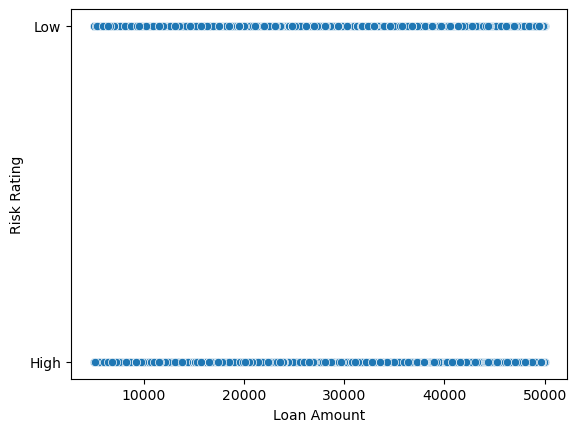

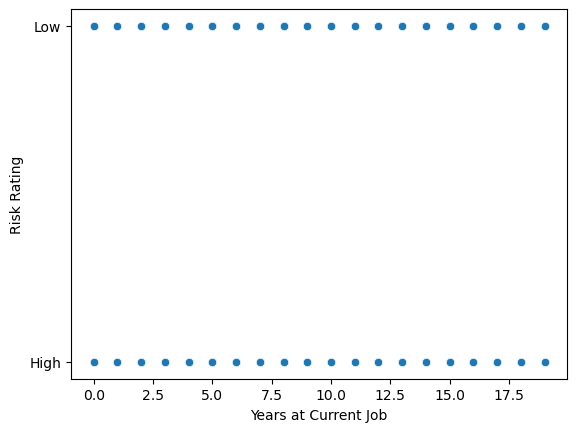

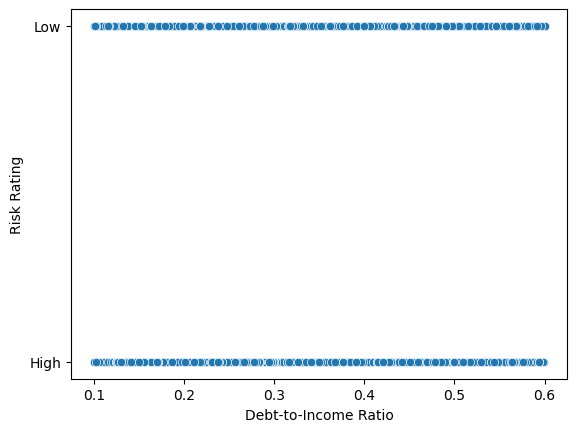

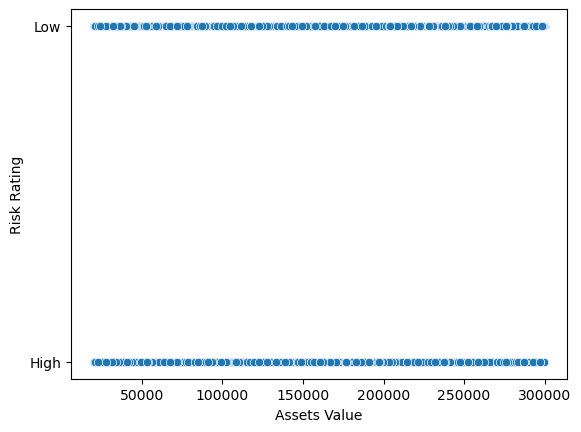

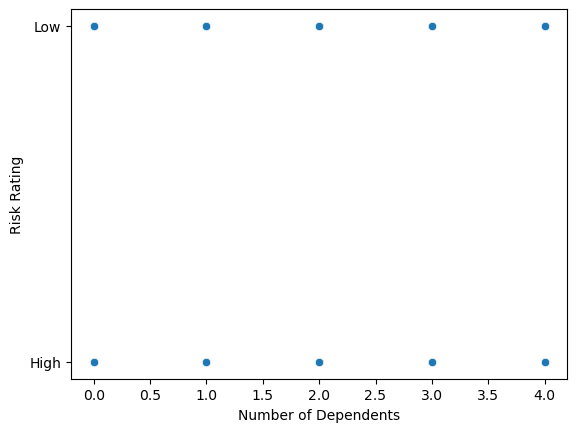

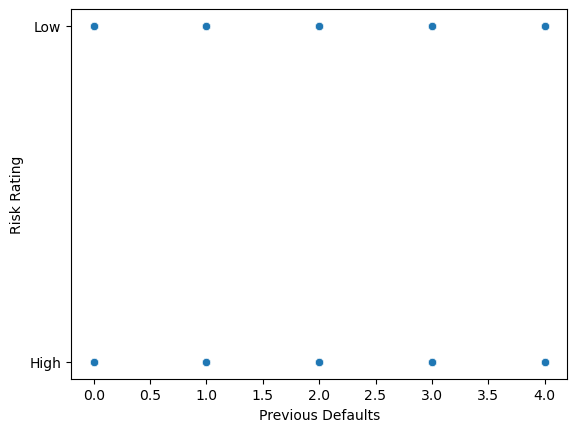

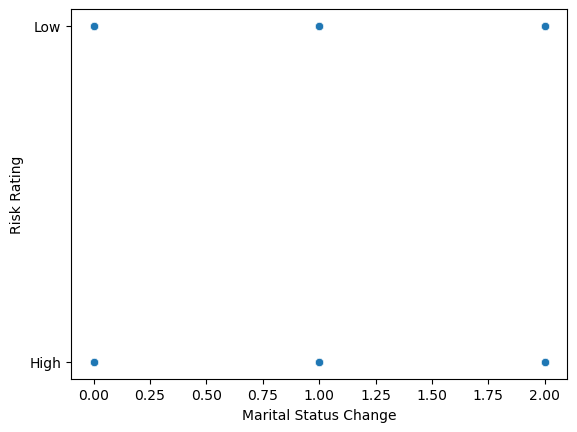

In [19]:
### Scatter plot
for i in ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
       'Previous Defaults', 'Marital Status Change']:
    sns.scatterplot(data=df,x=i,y='Risk Rating')
    plt.show()

In [20]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10500.0,43.563619,14.895120,18.000000,31.000000,43.000000,56.00000,69.00000
Income,8927.0,69535.935141,29091.181758,20005.000000,44110.500000,68990.000000,95206.00000,119997.00000
Credit Score,8945.0,699.093348,57.313108,600.000000,650.000000,700.000000,748.00000,799.00000
Loan Amount,8900.0,27449.669888,12978.148718,5001.000000,16309.500000,27499.500000,38692.25000,49995.00000
Years at Current Job,10500.0,9.449810,5.774541,0.000000,4.000000,9.000000,14.00000,19.00000
Debt-to-Income Ratio,10500.0,0.350195,0.143439,0.100004,0.228146,0.350571,0.47549,0.59997
Assets Value,8891.0,159886.288719,80414.567278,20104.000000,90818.500000,159757.000000,229182.50000,299999.00000
Number of Dependents,8929.0,2.017471,1.411489,0.000000,1.000000,2.000000,3.00000,4.00000
Previous Defaults,8967.0,1.986618,1.422251,0.000000,1.000000,2.000000,3.00000,4.00000
Marital Status Change,10500.0,1.005048,0.813306,0.000000,0.000000,1.000000,2.00000,2.00000


## Data Preprocessing 

In [22]:
#Missing value treatements using mean for continous value columns
for i in ["Income","Credit Score","Loan Amount","Assets Value"]:
    df[i].fillna(df[i].mean(),inplace=True)



In [23]:
#Missing value treatements using mode for descrete value columns

from sklearn.impute import SimpleImputer

# Create an imputer object with most_frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
df['Number of Dependents'] = imputer.fit_transform(df[['Number of Dependents']])
df['Previous Defaults'] = imputer.fit_transform(df[['Previous Defaults']])


In [24]:
df.isnull().sum()

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64

In [25]:
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.000000,688.000000,45713.000000,Business,Unemployed,19,Poor,0.154313,120228.000000,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,25,Non-binary,Bachelor's,Widowed,49427.000000,766.000000,36528.000000,Personal,Unemployed,10,Fair,0.143242,287140.000000,1.0,New Heather,IL,Namibia,3.0,1,Low
2,31,Non-binary,Master's,Widowed,45280.000000,672.000000,6553.000000,Personal,Self-employed,1,Good,0.378890,159886.288719,1.0,West Lindaview,MD,Bouvet Island (Bouvetoya),0.0,1,Low
3,18,Male,Bachelor's,Widowed,93678.000000,699.093348,27449.669888,Business,Unemployed,10,Poor,0.396636,246597.000000,1.0,Melissahaven,MA,Honduras,1.0,1,Low
4,32,Non-binary,Bachelor's,Widowed,20205.000000,710.000000,27449.669888,Auto,Unemployed,4,Fair,0.335965,227599.000000,0.0,North Beverly,DC,Pitcairn Islands,4.0,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,40,Male,High School,Married,43655.000000,614.000000,34565.000000,Home,Unemployed,11,Poor,0.399901,32179.000000,4.0,Curtismouth,IA,Uzbekistan,1.0,1,Low
10496,23,Non-binary,Bachelor's,Widowed,48088.000000,609.000000,26187.000000,Home,Self-employed,2,Fair,0.317633,159886.288719,4.0,Susanstad,TN,Djibouti,2.0,0,Low
10497,29,Non-binary,PhD,Married,46250.000000,642.000000,44369.000000,Home,Unemployed,19,Excellent,0.593999,196930.000000,4.0,South Morganchester,LA,Palau,2.0,1,High
10498,53,Non-binary,PhD,Divorced,40180.000000,638.000000,32752.000000,Home,Self-employed,12,Excellent,0.478035,276060.000000,1.0,Port Wayne,AK,Rwanda,0.0,2,High


In [26]:
#Check Unique values in each categorical column
for col in df.select_dtypes(include='object'):  # Select categorical columns (object type)
    unique_values = df[col].unique()
    print(f" '{col}': {unique_values}")

 'Gender': ['Male' 'Non-binary' 'Female']
 'Education Level': ['PhD' "Bachelor's" "Master's" 'High School']
 'Marital Status': ['Divorced' 'Widowed' 'Married' 'Single']
 'Loan Purpose': ['Business' 'Personal' 'Auto' 'Home']
 'Employment Status': ['Unemployed' 'Self-employed' 'Employed']
 'Payment History': ['Poor' 'Fair' 'Good' 'Excellent']
 'City': ['Port Elizabeth' 'New Heather' 'West Lindaview' ... 'South Morganchester'
 'Port Wayne' 'South Stacy']
 'State': ['AS' 'IL' 'MD' 'MA' 'DC' 'VT' 'OH' 'NM' 'MH' 'MS' 'KS' 'NH' 'VI' 'AZ'
 'OR' 'IA' 'GA' 'ID' 'TN' 'AL' 'MO' 'WY' 'KY' 'RI' 'DE' 'WV' 'ND' 'NY'
 'NJ' 'CO' 'MP' 'PW' 'NV' 'FM' 'CA' 'WA' 'NC' 'IN' 'GU' 'AR' 'WI' 'SD'
 'MT' 'MN' 'HI' 'NE' 'ME' 'VA' 'AK' 'PA' 'FL' 'LA' 'PR' 'OK' 'SC' 'UT'
 'MI' 'TX' 'CT']
 'Country': ['Cyprus' 'Namibia' 'Bouvet Island (Bouvetoya)' 'Honduras'
 'Pitcairn Islands' 'Thailand'
 'Antarctica (the territory South of 60 deg S)' 'Eritrea' 'Guadeloupe'
 'Malawi' 'Oman' 'Uruguay' 'Gambia'
 'South Georgia and the 

### Find correlation between Risk Rating column with other categorical columns

In [28]:

from scipy.stats import chi2_contingency
def cramers_v(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total sample size
    r, k = contingency_table.shape
    cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    return cramers_v
    
contingency_table = pd.crosstab(df['Gender'], df['Risk Rating'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V for Gender and Risk Rating: {cramers_v_value}")

contingency_table = pd.crosstab(df['Education Level'], df['Risk Rating'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V for Education Level and Risk Rating: {cramers_v_value}")

contingency_table = pd.crosstab(df['Marital Status'], df['Risk Rating'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V for Marital Status and Risk Rating: {cramers_v_value}")

contingency_table = pd.crosstab(df['Loan Purpose'], df['Risk Rating'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V for Loan Purpose and Risk Rating: {cramers_v_value}")

contingency_table = pd.crosstab(df['Employment Status'], df['Risk Rating'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V for Employement Status and Risk Rating: {cramers_v_value}")

contingency_table = pd.crosstab(df['Payment History'], df['Risk Rating'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V for Payment History and Risk Rating: {cramers_v_value}")


contingency_table = pd.crosstab(df['City'], df['Risk Rating'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V for City and Risk Rating: {cramers_v_value}")

contingency_table = pd.crosstab(df['State'], df['Risk Rating'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V for State and Risk Rating: {cramers_v_value}")

contingency_table = pd.crosstab(df['Country'], df['Risk Rating'])
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V for Country and Risk Rating: {cramers_v_value}")



Cramér's V for Gender and Risk Rating: 0.024397047231932888
Cramér's V for Education Level and Risk Rating: 0.012680084204131905
Cramér's V for Marital Status and Risk Rating: 0.022375185950592878
Cramér's V for Loan Purpose and Risk Rating: 0.025668056146136632
Cramér's V for Employement Status and Risk Rating: 0.015433015305277563
Cramér's V for Payment History and Risk Rating: 0.019797386112888005
Cramér's V for City and Risk Rating: 0.8802450179057865
Cramér's V for State and Risk Rating: 0.07595302023802004
Cramér's V for Country and Risk Rating: 0.15003672741293336


In [29]:
# Count the number of unique cities
unique_city_count = df['City'].nunique()
print(f"Number of unique cities: {unique_city_count}")


Number of unique cities: 8027


## Drop Columns

In [31]:
# Drop unnecessary categorical columns
df = df.drop(['State', 'City','Country', 'Education Level','Marital Status','Marital Status Change','Gender','Years at Current Job','Number of Dependents','Debt-to-Income Ratio','Credit Score'], axis=1)

print(df.columns)

Index(['Age', 'Income', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Payment History', 'Assets Value', 'Previous Defaults', 'Risk Rating'],
      dtype='object')


In [55]:
df

,Age,Income,Loan Amount,Loan Purpose,Employment Status,Payment History,Assets Value,City,Previous Defaults,Risk Rating
0,49,72799.000000,45713.000000,Business,Unemployed,Poor,120228.000000,Port Elizabeth,2.0,Low
1,25,49427.000000,36528.000000,Personal,Unemployed,Fair,287140.000000,New Heather,3.0,Low
2,31,45280.000000,6553.000000,Personal,Self-employed,Good,159886.288719,West Lindaview,0.0,Low
3,18,93678.000000,27449.669888,Business,Unemployed,Poor,246597.000000,Melissahaven,1.0,Low
4,32,20205.000000,27449.669888,Auto,Unemployed,Fair,227599.000000,North Beverly,4.0,Low
...,...,...,...,...,...,...,...,...,...,...
10495,40,43655.000000,34565.000000,Home,Unemployed,Poor,32179.000000,Curtismouth,1.0,Low
10496,23,48088.000000,26187.000000,Home,Self-employed,Fair,159886.288719,Susanstad,2.0,Low
10497,29,46250.000000,44369.000000,Home,Unemployed,Excellent,196930.000000,South Morganchester,2.0,High
10498,53,40180.000000,32752.000000,Home,Self-employed,Excellent,276060.000000,Port Wayne,0.0,High


### For Ordinal Categorical Data Encoding using Lable Encoding

In [56]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# defined order for ordinal columns

payment_history_order = ['Poor', 'Fair', 'Good', 'Excellent']
risk_rating_order = ['Low', 'High']


df['Payment History'] = pd.Categorical(df['Payment History'], categories=payment_history_order, ordered=True)
df['Risk Rating'] = pd.Categorical(df['Risk Rating'], categories=risk_rating_order, ordered=True)

#df['Education Level Encoded'] = label_encoder.fit_transform(df['Education Level'])
df['Payment History'] = label_encoder.fit_transform(df['Payment History'])
df['Risk Rating'] = label_encoder.fit_transform(df['Risk Rating'])


## Group city by risk rating mean

In [61]:
# Group by City and calculate the mean Risk Rating for each city
city_risk_means = df.groupby('City')['Risk Rating'].mean()

# Assign groups based on risk level 
df['City_grouped'] = df['City'].apply(lambda x: 'High_Risk_Cities' if city_risk_means[x] > 0.5
                                                      else 'Low_Risk_Cities')


print(df[['City', 'City_grouped']])


                      City      City_grouped
0           Port Elizabeth  High_Risk_Cities
1              New Heather  High_Risk_Cities
2           West Lindaview  High_Risk_Cities
3             Melissahaven  High_Risk_Cities
4            North Beverly  High_Risk_Cities
...                    ...               ...
10495          Curtismouth  High_Risk_Cities
10496            Susanstad  High_Risk_Cities
10497  South Morganchester   Low_Risk_Cities
10498           Port Wayne   Low_Risk_Cities
10499          South Stacy  High_Risk_Cities

[10500 rows x 2 columns]


In [63]:
 df['City_grouped'].value_counts()

City_grouped
High_Risk_Cities    8916
Low_Risk_Cities     1584
Name: count, dtype: int64

In [65]:
#  defined order for city columns
city_grouped_order = ["Low_Risk_Cities", "High_Risk_Cities"]


df['City_grouped'] = pd.Categorical(df['City_grouped'], categories=city_grouped_order, ordered=True)

df['City_grouped'] = label_encoder.fit_transform(df['City_grouped'])
df['City'] = df['City_grouped']
df = df.drop('City_grouped', axis=1)


In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10500 non-null  int64  
 1   Income             10500 non-null  float64
 2   Loan Amount        10500 non-null  float64
 3   Loan Purpose       10500 non-null  object 
 4   Employment Status  10500 non-null  object 
 5   Payment History    10500 non-null  int32  
 6   Assets Value       10500 non-null  float64
 7   City               10500 non-null  int32  
 8   Previous Defaults  10500 non-null  float64
 9   Risk Rating        10500 non-null  int32  
dtypes: float64(4), int32(3), int64(1), object(2)
memory usage: 697.4+ KB


## Correlation Matrix

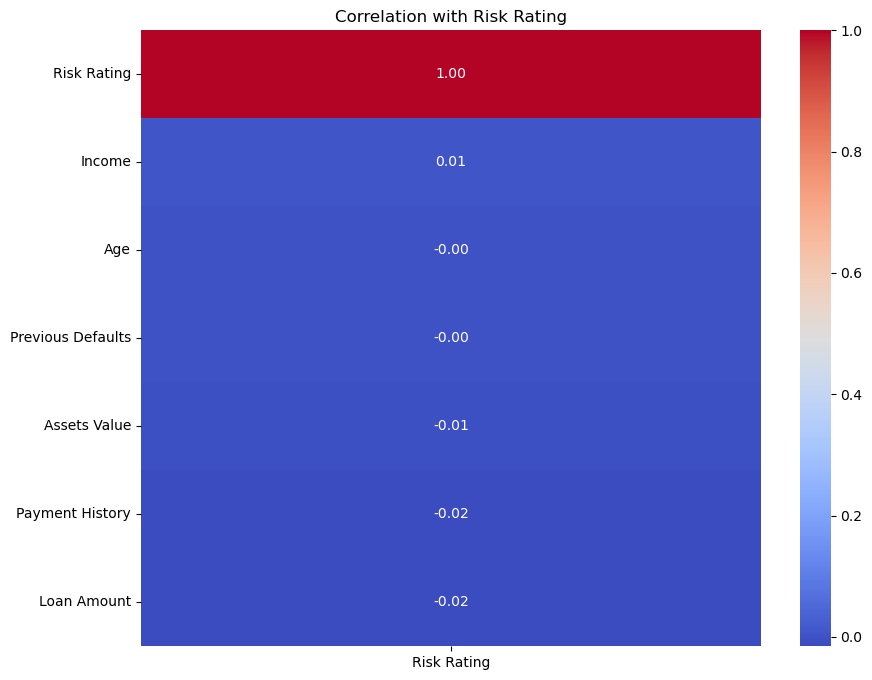

In [58]:
# Select only numerical columns from the dataframe
numerical_cols = df.select_dtypes(include=['int64','int32', 'float64'])

# Calculate correlation matrix for numerical columns
corr_matrix = numerical_cols.corr()

# Check if 'Risk Rating' is an existing column
if 'Risk Rating' in corr_matrix.columns:
    # Get the correlation between 'Risk Rating' and other numerical features
    risk_rating_correlation = corr_matrix['Risk Rating'].sort_values(ascending=False)

    # Visualize the correlation matrix as a heatmap using seaborn
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.heatmap(risk_rating_correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation with Risk Rating')
    plt.show()
else:
    print("'Risk Rating' column is not found in the correlation matrix.")



### Nominal Categorical data encoding with One-Hot Encoding

In [60]:
# List of columns to One-Hot Encode
categorical_columns = [ 'Loan Purpose', 'Employment Status']

# Apply One-Hot Encoding to the specified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Convert only the newly created one-hot encoded columns to int
one_hot_encoded_columns = df_encoded.columns.difference(df.columns)

# Apply astype(int) only to these new one-hot encoded columns
df_encoded[one_hot_encoded_columns] = df_encoded[one_hot_encoded_columns].astype(int)

# Replace original DataFrame with the encoded version
df = df_encoded.copy()


print("DataFrame after One-Hot Encoding with original columns replaced:")
print(df)


DataFrame after One-Hot Encoding with original columns replaced:
       Age        Income   Loan Amount  Payment History   Assets Value  \
0       49  72799.000000  45713.000000                3  120228.000000   
1       25  49427.000000  36528.000000                1  287140.000000   
2       31  45280.000000   6553.000000                2  159886.288719   
3       18  93678.000000  27449.669888                3  246597.000000   
4       32  20205.000000  27449.669888                1  227599.000000   
...    ...           ...           ...              ...            ...   
10495   40  43655.000000  34565.000000                3   32179.000000   
10496   23  48088.000000  26187.000000                1  159886.288719   
10497   29  46250.000000  44369.000000                0  196930.000000   
10498   53  40180.000000  32752.000000                0  276060.000000   
10499   24  69535.935141  27449.669888                0   71699.000000   

       Previous Defaults  Risk Rating  Loan Pu

### Scaling numerical features

In [62]:
from sklearn.preprocessing import MinMaxScaler

#  Only scale certain numerical columns 
numerical_columns_to_scale = ['Age', 'Income', 'Loan Amount', 'Assets Value']
df_numerical = df[numerical_columns_to_scale]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

# Combine with the rest of the data that doesn't require scaling
df_rest = df.drop(columns=numerical_columns_to_scale)
df = pd.concat([df_rest, df_scaled], axis=1)

print("Final DataFrame after selective scaling:")
print(df.head())


Final DataFrame after selective scaling:
   Payment History  Previous Defaults  Risk Rating  Loan Purpose_Auto  \
0                3                2.0            1                  0   
1                1                3.0            1                  0   
2                2                0.0            1                  0   
3                3                1.0            1                  0   
4                1                4.0            1                  1   

   Loan Purpose_Business  Loan Purpose_Home  Loan Purpose_Personal  \
0                      1                  0                      0   
1                      0                  0                      1   
2                      0                  0                      1   
3                      1                  0                      0   
4                      0                  0                      0   

   Employment Status_Employed  Employment Status_Self-employed  \
0                           0    

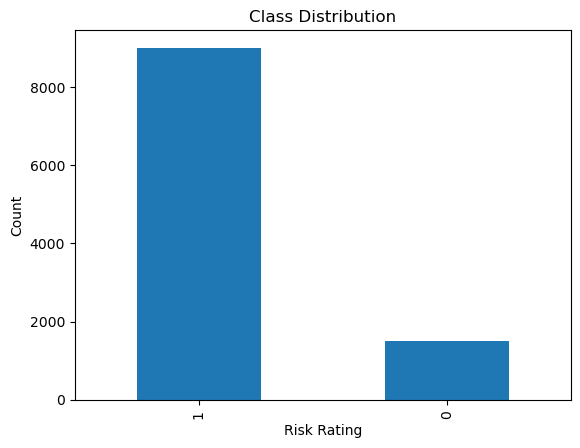

In [64]:
# Check class column distribution
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Risk Rating' is your target variable
risk_rating_counts = df['Risk Rating'].value_counts()

# Plot the class distribution as a bar chart
risk_rating_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Risk Rating")
plt.ylabel("Count")
plt.show()




## Split the data

In [66]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop(columns='Risk Rating') 
y = df['Risk Rating']

# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [68]:
print(f"Training samples: {X_train.shape}")
print(f"Validation samples: {X_test.shape}")
print(f"Training samples: {y_train.shape}")
print(f"Validation samples: {y_test.shape}")

Training samples: (8400, 13)
Validation samples: (2100, 13)
Training samples: (8400,)
Validation samples: (2100,)


In [86]:
## Handling class imbalance

#### Under Sample the majority class and Over Sample the minority class

In [89]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

#'Risk Rating' is the target column
X = df.drop(columns=['Risk Rating'])  # Features
y = df['Risk Rating']  # Target

# Combine X and y into one DataFrame for easy manipulation
df_combined = pd.concat([X, y], axis=1)

# Find the value counts for each class in the target column
class_counts = y.value_counts()

# Identify the majority and minority classes
majority_class = class_counts.idxmax() 
minority_class = class_counts.idxmin()  

# Separate each class
df_majority = df_combined[df_combined['Risk Rating'] == majority_class]
df_minority = df_combined[df_combined['Risk Rating'] == minority_class]

# Undersample the majority class to 4500 records
df_majority_under = resample(df_majority, replace=False, n_samples=4500, random_state=42)

# Oversample the minority class to 4500 records if needed
df_minority_over = resample(df_minority, replace=True, n_samples=4500, random_state=42)

# Combine the resampled classes
df_resampled = pd.concat([df_majority_under, df_minority_over])

# Separate X and y again after resampling
X_resampled = df_resampled.drop(columns=['Risk Rating'])
y_resampled = df_resampled['Risk Rating']

# Check class distribution after resampling
print(f"Class distribution after resampling: {y_resampled.value_counts()}")

# Split the dataset into training and testing sets 
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Class distribution after resampling: Risk Rating
1    4500
0    4500
Name: count, dtype: int64


In [91]:
print(f"Training samples: {X_resampled_train.shape}")
print(f"Validation samples: {X_resampled_test.shape}")
print(f"Training samples: {y_resampled_train.shape}")
print(f"Validation samples: {y_resampled_test.shape}")

Training samples: (8400, 14)
Validation samples: (2100, 14)
Training samples: (8400,)
Validation samples: (2100,)


### Handling class imbalance using SMOTETomek

In [94]:
#from imblearn.combine import SMOTETomek
# Apply SMOTE + Tomek Links
#smote_tomek = SMOTETomek(random_state=42)
#X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE + Tomek Links
#print("Class distribution after SMOTE + Tomek Links:")
#print(y_train_smote_tomek.value_counts())


### Handling class imbalance using SMOTE

In [97]:
#from imblearn.combine import SMOTE

# Apply SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
#print("Class distribution after SMOTE:")
#print(y_train_smote.value_counts())

In [99]:
X_train

,Payment History,City,Previous Defaults,Loan Purpose_Auto,Loan Purpose_Business,Loan Purpose_Home,Loan Purpose_Personal,Employment Status_Employed,Employment Status_Self-employed,Employment Status_Unemployed,Age,Income,Loan Amount,Assets Value
5397,2,1,4.0,0,0,1,0,0,0,1,0.450980,0.291493,0.430946,0.830397
6322,3,1,4.0,0,0,0,1,0,1,0,0.921569,0.114189,0.941792,0.238722
987,2,0,3.0,1,0,0,0,1,0,0,0.647059,0.637971,0.934747,0.499410
7653,2,1,0.0,1,0,0,0,0,1,0,0.843137,0.838187,0.498926,0.093653
3624,2,0,0.0,0,0,1,0,0,1,0,0.254902,0.351068,0.624305,0.520424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,3,0,2.0,0,0,0,1,1,0,0,0.000000,0.623450,0.818820,0.595027
1518,3,1,0.0,0,1,0,0,1,0,0,0.411765,0.495349,0.696426,0.975401
1214,0,1,0.0,0,1,0,0,0,1,0,0.607843,0.859149,0.399809,0.280066
225,0,0,2.0,0,1,0,0,0,0,1,0.529412,0.495349,0.849558,0.826803


## Model Selection

#### Without using imbalance techniques

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(kernel='linear')
}

# Evaluate each model using cross-validation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy}")
    print(classification_report(y_test, y_pred))


Logistic Regression: Accuracy = 0.8571428571428571
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.86      1.00      0.92      1800

    accuracy                           0.86      2100
   macro avg       0.43      0.50      0.46      2100
weighted avg       0.73      0.86      0.79      2100

Random Forest: Accuracy = 0.8566666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.86      1.00      0.92      1800

    accuracy                           0.86      2100
   macro avg       0.43      0.50      0.46      2100
weighted avg       0.73      0.86      0.79      2100

Gradient Boosting: Accuracy = 0.8566666666666667
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       300
           1       0.86      1.00      0.92      1800

    accuracy                         

#### After applying Under Sample the majority class and Over Sample the minority class

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(kernel='linear')
}

# Evaluate each model using cross-validation
for name, model in models.items():
    model.fit(X_resampled_train, y_resampled_train)
    y_pred = model.predict(X_resampled_test)
    accuracy = accuracy_score(y_resampled_test, y_pred)
    print(f"{name}: Accuracy = {accuracy}")
    print(classification_report(y_resampled_test, y_pred))


Logistic Regression: Accuracy = 0.9576190476190476
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       300
           1       0.98      0.97      0.98      1800

    accuracy                           0.96      2100
   macro avg       0.90      0.93      0.92      2100
weighted avg       0.96      0.96      0.96      2100

Random Forest: Accuracy = 0.9576190476190476
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       300
           1       0.98      0.97      0.98      1800

    accuracy                           0.96      2100
   macro avg       0.90      0.93      0.92      2100
weighted avg       0.96      0.96      0.96      2100

Gradient Boosting: Accuracy = 0.9571428571428572
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       300
           1       0.98      0.97      0.97      1800

    accuracy                         

## Model Training

In [72]:
import joblib

# Assuming RandomForest was the best-performing model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')
print("Model saved successfully!")



Model saved successfully!


### Confusion Matrix for Model Performance Evaluation

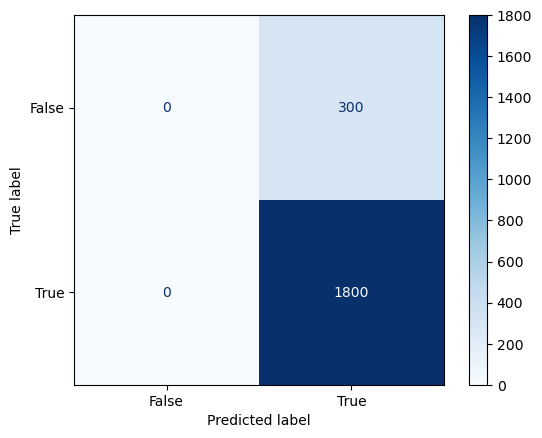

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display with custom labels ('False', 'True')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])

# Plot the confusion matrix with the 'Blues' color map
disp.plot(cmap='Blues')
plt.show()



## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate on test data
y_pred = grid_search.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits


### Learning Curve

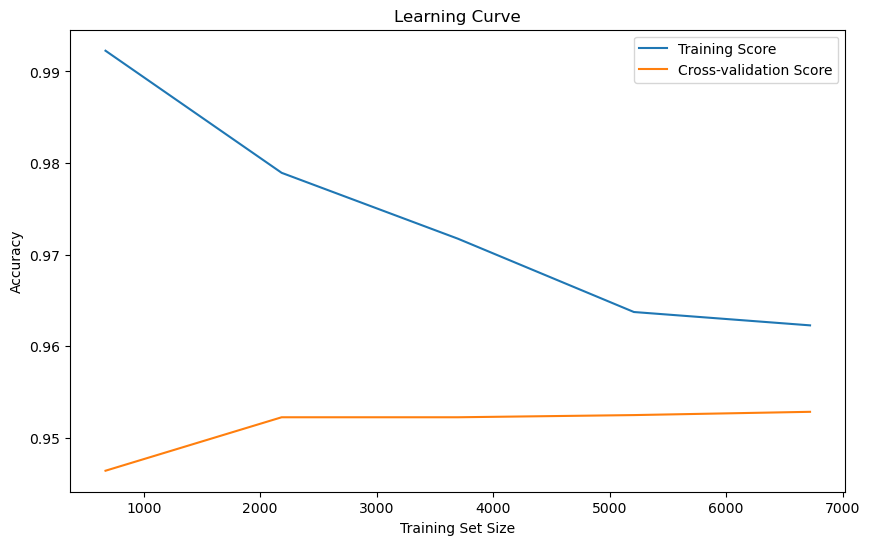

In [112]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, 
                                                        X_train, y_train, cv=5, 
                                                        scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

### Cross-Validation

In [114]:
# Cross-validation on training data
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy: {cv_scores.mean()}")


Cross-validation accuracy: 0.9528571428571428


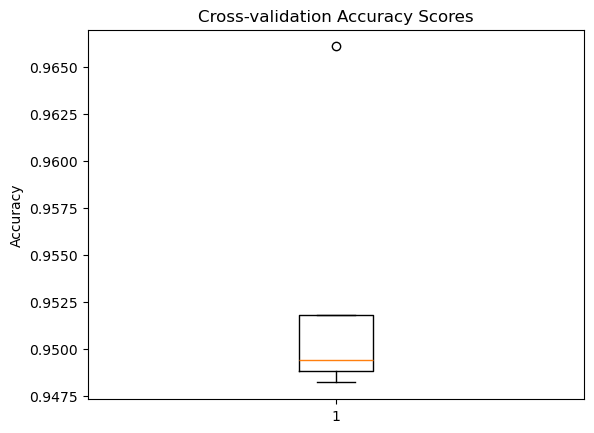

In [115]:
plt.boxplot(cv_scores)
plt.title("Cross-validation Accuracy Scores")
plt.ylabel("Accuracy")
plt.show()


In [116]:
df.columns

Index(['Payment History', 'City', 'Previous Defaults', 'Risk Rating',
       'Loan Purpose_Auto', 'Loan Purpose_Business', 'Loan Purpose_Home',
       'Loan Purpose_Personal', 'Employment Status_Employed',
       'Employment Status_Self-employed', 'Employment Status_Unemployed',
       'Age', 'Income', 'Loan Amount', 'Assets Value'],
      dtype='object')

### Making Predictions

In [41]:
import pandas as pd
import joblib 

# Load your trained model
model = joblib.load('best_model.pkl')  

# New prediction data after dropping columns
test_values_new = [
    {
        'Payment History': 4,
        'City': 0,
        'Marital Status Change': 0,
        'Gender_Female': 0,
        'Gender_Male': 1,
        'Marital Status_Married': 1,
        'Loan Purpose_Auto': 1,
        'Loan Purpose_Business': 0,
        'Loan Purpose_Personal': 0,
        'Employment Status_Employed': 1,
        'Employment Status_Unemployed': 0,
        'Loan Amount': 18000,
        'Assets Value': 60000,
        'Years at Current Job': 8
    },
    {
        'Payment History': 1,
        'City': 0,
        'Marital Status Change': 1,
        'Gender_Female': 1,
        'Gender_Male': 0,
        'Marital Status_Married': 0,
        'Loan Purpose_Auto': 0,
        'Loan Purpose_Business': 1,
        'Loan Purpose_Personal': 1,
        'Employment Status_Employed': 0,
        'Employment Status_Unemployed': 1,
        'Loan Amount': 9000,
        'Assets Value': 30000,
        'Years at Current Job': 1
    },
    {
        'Payment History': 5,
        'City': 1,
        'Marital Status Change': 1,
        'Gender_Female': 0,
        'Gender_Male': 1,
        'Marital Status_Married': 1,
        'Loan Purpose_Auto': 0,
        'Loan Purpose_Business': 0,
        'Loan Purpose_Personal': 0,
        'Employment Status_Employed': 1,
        'Employment Status_Unemployed': 0,
        'Loan Amount': 25000,
        'Assets Value': 80000,
        'Years at Current Job': 12
    },
    {
        'Payment History': 2,
        'City': 0,
        'Marital Status Change': 0,
        'Gender_Female': 1,
        'Gender_Male': 0,
        'Marital Status_Married': 1,
        'Loan Purpose_Auto': 0,
        'Loan Purpose_Business': 1,
        'Loan Purpose_Personal': 0,
        'Employment Status_Employed': 1,
        'Employment Status_Unemployed': 0,
        'Loan Amount': 14000,
        'Assets Value': 45000,
        'Years at Current Job': 4
    },
    {
        'Payment History': 3,
        'City': 1,
        'Marital Status Change': 0,
        'Gender_Female': 1,
        'Gender_Male': 0,
        'Marital Status_Married': 0,
        'Loan Purpose_Auto': 1,
        'Loan Purpose_Business': 0,
        'Loan Purpose_Personal': 1,
        'Employment Status_Employed': 0,
        'Employment Status_Unemployed': 0,
        'Loan Amount': 16000,
        'Assets Value': 50000,
        'Years at Current Job': 3
    }
]

# Convert the test values to a DataFrame
df_test_values_new = pd.DataFrame(test_values_new)

# Ensure all required columns for prediction are included
for col in model.feature_names_in_:  # Ensuring all model features are included in the test data
    if col not in df_test_values_new.columns:
        df_test_values_new[col] = 0

# Reorder the columns to match the training data
df_test_values_new = df_test_values_new[model.feature_names_in_]

# Predict with the loaded model
predictions = model.predict(df_test_values_new)
probabilities = model.predict_proba(df_test_values_new)

# Output the prediction and probabilities for each dataset
for i, (prediction, prob) in enumerate(zip(predictions, probabilities), start=1):
    print(f"Prediction for Test Case {i}: {'High Risk' if prediction == 1 else 'Low Risk'}, Probability: {prob}")

Prediction for Test Case 1: High Risk, Probability: [0.23 0.77]
Prediction for Test Case 2: High Risk, Probability: [0.24 0.76]
Prediction for Test Case 3: Low Risk, Probability: [0.62 0.38]
Prediction for Test Case 4: High Risk, Probability: [0.23 0.77]
Prediction for Test Case 5: Low Risk, Probability: [0.6 0.4]
